In [95]:
import networkx as nx
import numpy as np
from networkx.algorithms import approximation
from networkx.algorithms import reciprocity
import matplotlib.pyplot as plt
from collections import Counter
import random
from itertools import combinations, groupby
from node2vec import Node2Vec
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import statistics

%matplotlib inline

In [109]:
graph = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
number_of_nodes = 300

In [110]:
def extract_local_features(graph):
    centrality_dict = nx.degree_centrality(graph)
    clustering_dict = nx.clustering(graph)
    avg_neighbor_degree_dict = nx.average_neighbor_degree(graph)

    features = []
    nodes = random.sample(list(graph.nodes()), number_of_nodes)  # Selecting only required number of random nodes
    for node in nodes:
        degree = graph.degree(node)
        centrality = centrality_dict[node]
        avg_neighbor_degree = avg_neighbor_degree_dict[node] if node in avg_neighbor_degree_dict else 0
        clustering_coefficient = clustering_dict[node]
        pagerank = nx.pagerank(graph)[node]
        triads = nx.triangles(graph, node)
        squares = sum(1 for u, v in graph.edges(node) for w in graph.neighbors(v) if graph.has_edge(u, w))

        node_features = [degree, centrality, avg_neighbor_degree, clustering_coefficient, pagerank, triads, squares]
        features.append(node_features)
        
    return features



#Plotting a graph for just the required number of nodes

sample_extracted_nodes = random.sample(list(graph.nodes()), number_of_nodes)  
current_graph_piece = graph.subgraph(sample_extracted_nodes)


current_nodes = extract_local_features(current_graph_piece)
current_nodes = np.array(current_nodes)
current_nodes.shape

(300, 7)

In [111]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Using k means
k = 4
kmeans_model = KMeans(n_clusters=k)
k_labels = kmeans_model.fit_predict(current_nodes)

silhouette = silhouette_score(current_nodes, k_labels)
print("Silhouette Scores:", silhouette)

Silhouette Scores: 0.74053406298755


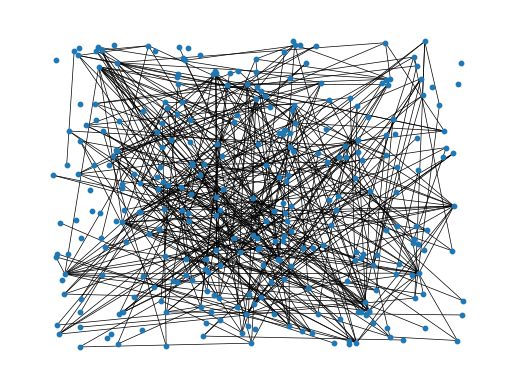

In [112]:
layout = nx.random_layout(current_graph_piece)
plt.axis('off')

nx.draw(current_graph_piece, pos=layout, node_size=10, width=0.5)
plt.show()

In [113]:


outputdf = pd.DataFrame(current_nodes)
outputdf["cluster_labels"] = k_labels
outputdf.head()

,0,1,2,3,4,5,6,cluster_labels
0,3.0,0.010033,2.666667,0.666667,0.005146,2.0,4.0,0
1,0.0,0.000000,0.000000,0.000000,0.000644,0.0,0.0,0
2,3.0,0.010033,4.666667,1.000000,0.003479,3.0,6.0,0
3,1.0,0.003344,1.000000,0.000000,0.004295,0.0,0.0,0
4,1.0,0.003344,1.000000,0.000000,0.004295,0.0,0.0,0


c:\Users\khushi\VSCode\graph_assignment\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


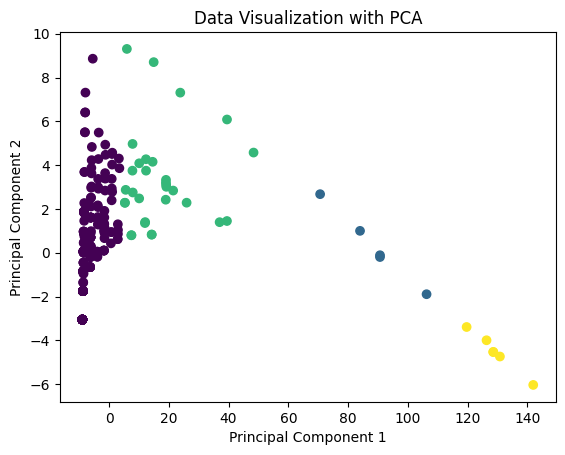

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_features = pca.fit_transform(outputdf)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=k_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization with PCA')
plt.show()

(0.0, 1.0, 0.0, 1.0)

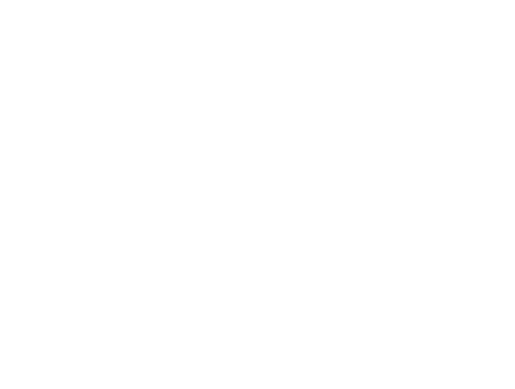

In [62]:
# sampled_graph = nx.Graph()
# sampled_graph.add_nodes_from(random.sample(list(graph.nodes()), 500))
# sampled_graph.add_edges_from(random.sample(list(graph.edges()), 100))


# graph = nx.Graph()
# graph.add_edges_from(edges)

# sampled_graph = nx.Graph()
# sampled_graph.add_nodes_from(graph.nodes())
# sampled_graph.add_edges_from(graph.edges())

# layout = nx.random_layout(sampled_graph)
# plt.axis('off')

# nx.draw(sampled_graph, pos=layout, node_size=10, width=0.5)
# plt.show()